# Projektna naloga: ANALIZA SVETOVNE ŽENSKE TENIŠKE LESTVICE

V projektni nalogi bom obravnavala podatke, ki sem jih pridobila z ženske svetovne teniške lestvice WTA.

Zajela sem osnovne podatke o igralkah (rank, starost, država, datum rojstva, starost, leto začetka kariere) in podatke o odigranih turnirjih, razmerjih zmag in porazov ter zaslužku.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

### Osnovno

Oglejmo si tabelo z vsemi podatki. Iz nje lahko takoj dobimo nekaj povprečnih vrednosti in morda zanimivih ugotovitev.

In [8]:
igralke = pd.read_csv('seznam_igralk.csv', index_col='rank')
pd.options.display.max_rows = 10
igralke

,id,ime,drzava,datum_rojstva,starost,roka,tocke,odigrani_turnirji,zacetek,letni_zasluzek,karierni_zasluzek,letno_razmerje,karierno_razmerje
rank,,,,,,,,,,,,,
1,314320,Halep Simona,Romania,27 Sep 1991,27,desna,6921,17,2006,7409564.0,28145579,46/11,450/197
2,311470,Kerber Angelique,Germany,18 Jan 1988,30,leva,5875,19,2003,5686362.0,27156841,46/19,595/311
3,313402,Wozniacki Caroline,Denmark,11 Jul 1990,28,desna,5586,19,2005,6657719.0,33492413,41/17,610/247
4,316738,Svitolina Elina,Ukraine,12 Sep 1994,24,desna,5350,19,2010,5737247.0,13108625,44/15,329/169
5,319998,Osaka Naomi,Japan,16 Oct 1997,21,desna,5115,20,-,6394289.0,7629197,42/20,177/119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,327404,Saito Yuna,Japan,15 Jun 2002,15,NaN,3,3,-,1664.0,1834,2/7,3/9
1224,327454,Arseneault Ariana,Canada,29 Jul 2001,16,NaN,3,3,-,950.0,950,0/5,0/5
1224,328585,Lim Lynelle,Singapore,25 Feb 2000,17,NaN,3,3,-,1452.0,1452,3/8,3/8


Poglejmo si iz katerih držav prihaja največ igralk.

'Na lestvici je trenutno 11 slovenskih igralk.'

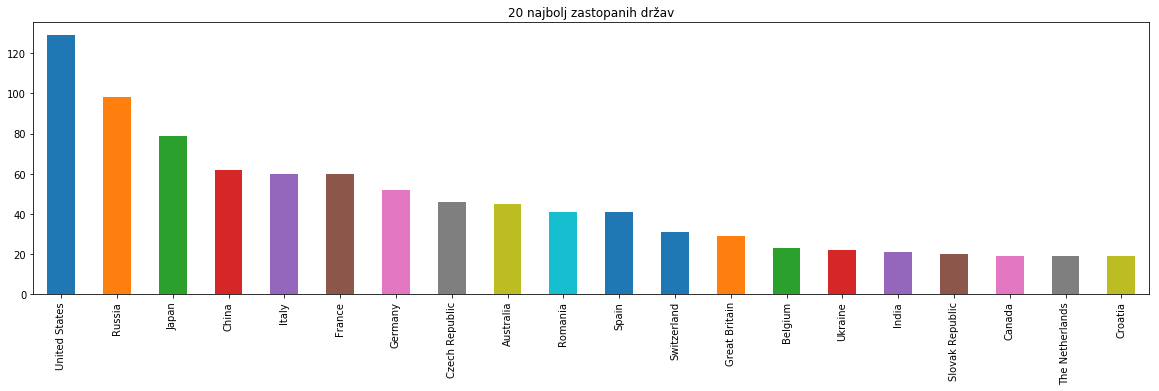

In [9]:
igralke['drzava'].value_counts().head(20).plot(kind = 'bar', figsize=(20, 5), title='20 najbolj zastopanih držav')
st = igralke.groupby('drzava').size()["Slovenia"]
'Na lestvici je trenutno {} slovenskih igralk.'.format(st)

In [10]:
povp = round(igralke['starost'].mean(), 1)
'Povprečna starost igralk je {} let.'.format(povp)

'Povprečna starost igralk je 22.5 let.'

Text(0, 0.5, 'število točk')

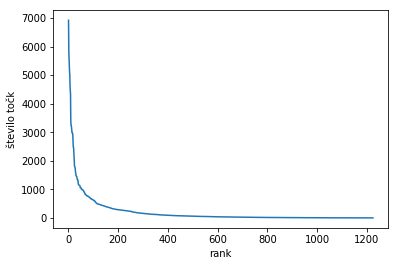

In [11]:
#poglejmo si kako je odvisno število točk od ranka
plt = igralke['tocke'].plot()
plt.set_xlabel("rank")
plt.set_ylabel("število točk")

Z grafa vidimo, da število točk od zadaj proti vrhu sprva raste počasi nato pa vedno bolj strmo. To pomeni da sprva že majhna sprememba števila točk lahko pomeni veliko spremembo pri ranku, ko pa se prebijemo med prvih 200, rabimo za višje mesto na lestvici vedno več točk - graf je eksponenten.

Poglejmo si koliko turnirjev so odigrale igralke v letu 2018.

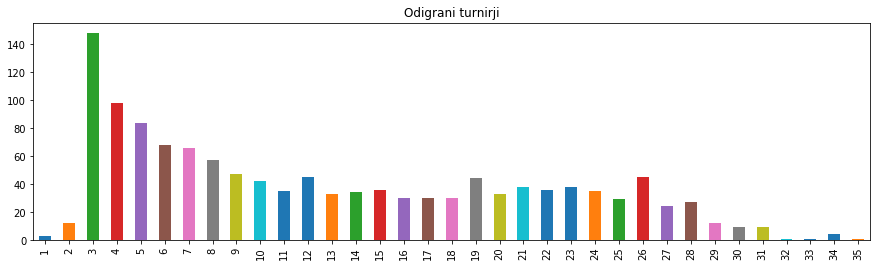

In [12]:
igralke['odigrani_turnirji'].value_counts().sort_index(ascending=True).plot(kind = 'bar', figsize=(15, 4), title='Odigrani turnirji')

Največ je bilo igralk, ki so odigrale 3 - 5 turnirjev v tem letu. Zanimivo je, da med 10 in nekje 28 odigranimi turnirji v letu ni velikih odstopanj. Opazimo tudi, da je nekaj igralk, ki so odigrale 30 ali več turnirjev v letu, kar je več kot 2.5 turnirja na mesec!

In [13]:
povp_st_turnirjev = round(igralke['odigrani_turnirji'].mean(), 1)

#poglejmo si še povprečni zaslužek
povp_letni_zasluzek = round(igralke['letni_zasluzek'].mean(), 2)
povp_karierni_zasluzek = round(igralke['karierni_zasluzek'].mean(), 2)
r'Povprečno število odigranih turnirjev v 2018 je bilo {}. Povprečni zaslužek v letu 2018 je znašal {} dolarjev, v povprečju pa so igralke v celotni karieri zaslužile {} dolarjev.'.format(povp_st_turnirjev, povp_letni_zasluzek, povp_karierni_zasluzek)

'Povprečno število odigranih turnirjev v 2018 je bilo 12.9. Povprečni zaslužek v letu 2018 je znašal 135192.12 dolarjev, v povprečju pa so igralke v celotni karieri zaslužile 846422.38 dolarjev.'

Ena od hipotez oz. vprašanj, ki sem si jih zastavila, je bilo, ali večje število odigranih turnirjev pomeni tudi višje mesto na lestvici. To je namreč precej pogost pojav v mlajših kategorijah, kjer si tudi slabše igralke lahko hitro naberejo točke, če odgrajo več slabših turnirjev.

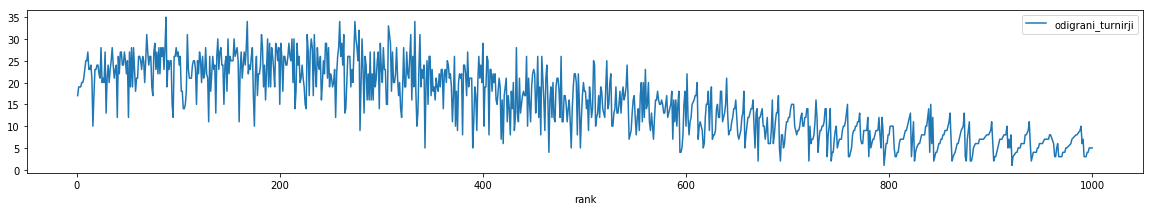

In [14]:
prvih_1000 = igralke.head(1000)
igralke_rank = prvih_1000.groupby('rank')
igralke_rank[['odigrani_turnirji']].mean().plot(figsize=(20, 3))

Iz grafa je razvidno, da višje uvrščene igralke odigrajo več turnirjev, vendar se ta razlika pozna le, če gledamo celotno lestvico. Poglejmo, ali lahko ta trend opazimo tudi pri prvih 100 igralkah. 

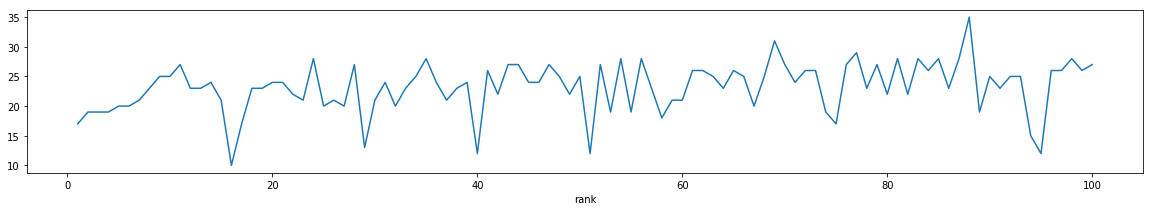

In [15]:
prvih_100 = igralke.head(100)
igralke_rank = prvih_100.groupby('rank')
igralke_rank['odigrani_turnirji'].mean().plot(figsize=(20, 3))

Vidimo, da ta trend ni opazen in da vrednosti zelo nihajo.
Posebej si poglejmo še graf, kjer obravnavamo starost v odvisnosti od števila odigranih turnirjev.

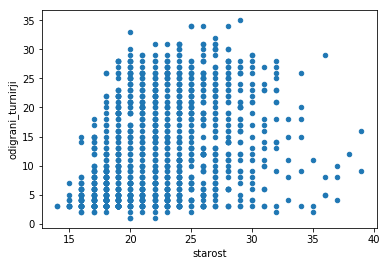

In [16]:
igralke[['starost', 'odigrani_turnirji']].plot.scatter('starost', 'odigrani_turnirji')

Vidimo, da na grafu ne opazimo nobenega trenda razen tega, da poleg Serene Williams ni veliko žensk starih več kot 35 let, ki bi aktivno tekmovale. 

Poglejmo si še tiste igralke, ki so v letu odigrale 30 ali več turnirjev. Ali se nahajajo višje na lestvici?

In [17]:
zelo_aktvine_igralke = igralke[igralke.odigrani_turnirji >= 30]
zelo_aktvine_igralke

,id,ime,drzava,datum_rojstva,starost,roka,tocke,odigrani_turnirji,zacetek,letni_zasluzek,karierni_zasluzek,letno_razmerje,karierno_razmerje
rank,,,,,,,,,,,,,
69,315294,Jakupovic Dalila,Slovenia,24 Mar 1991,27,desna,829,31,-,338332.0,563998,41/27,312/274
88,312584,Rodina Evgeniya,Russia,04 Feb 1989,29,desna,699,35,2004,408204.0,2057930,35/34,437/319
109,313349,Rus Arantxa,The Netherlands,13 Dec 1990,27,leva,559,31,-,222333.0,1290631,45/33,421/277
139,314237,Doi Misaki,Japan,29 Apr 1991,27,leva,434,30,-,99735.0,2326507,39/28,310/271
149,315265,Perrin Conny,Switzerland,25 Dec 1990,27,desna,407,30,-,98375.0,326524,39/27,405/286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,319962,Bains Naiktha,Australia,17 Dec 1997,20,NaN,153,33,-,43325.0,124065,28/33,108/120
308,318840,Arcangioli Manon,France,28 Aug 1994,24,desna,153,31,-,33967.0,195741,31/30,265/207
329,316050,Scholl Chiara,United States,05 Jul 1992,26,NaN,136,31,-,22207.0,199765,35/36,312/256


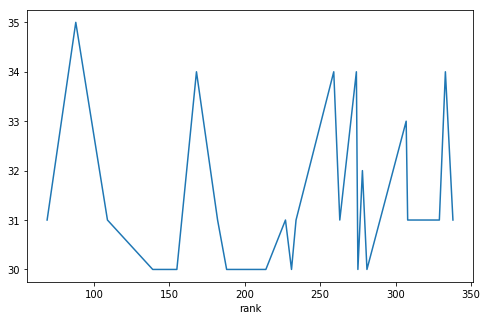

In [18]:
zelo_aktvine_igralke['odigrani_turnirji'].plot(figsize=(8, 5))

Vidimo, da so vse igralke med prvimi 350 igralkami, kar je precej visoka uvrstitev. Vidimo pa, da jih je največ nekje med 250 in 350 mestom. Lahko bi sklepali, da se z velikim številom odigranih turnirjev lahko prebijemo naprej, za zelo visoko uvrstitev pa bo potrebno še kaj več. Pridobljene točke je treba namreč iz sezone v sezono ohranjati.


### Datum in leto rojstva

#### Leto rojstva

Katerega leta je rojenih največ igralk?

In [19]:
seznam_let = []
for i in range(1283):
    leto = igralke.iloc[i]['datum_rojstva'].split()[2]
    seznam_let.append(leto)
seznam_let.sort()
slovar = {}
for element in seznam_let:
    if element in slovar:
        slovar[element] += 1
    else:
        slovar[element] = 1

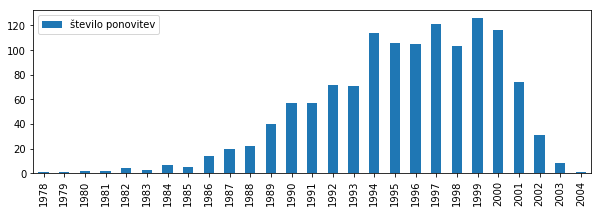

In [23]:
tabela = pd.DataFrame.from_dict(slovar, 'index')
tabela.columns = ['število ponovitev']
tabela
tabela.plot(kind = 'bar', figsize=(10, 3))

Največ igralk je rojenih med leti 1994 in 2000. Med njimi sta tudi letnici 1997 in 1996 - igralke, ki so bile rojene v teh letih so danes stare 22 ali 23 let, kar je ravno povprečna starost.

#### Povezava med mesecem rojstva in mestom na lestvici

V mlajših kategorijah je hitrost razvoja tekmovalcev in tekmovalk tako velika, da so igralci, rojeni v prih treh mesecih, zelo pogosto višje na lestvici. Zanima nas, ali se to pojavlja tudi pri starejših oziroma pri profesionalnih igralkah.

In [24]:
seznam_mesecev = []
for i in range(1283):
    mesec = mesec = igralke.iloc[i]['datum_rojstva'].split()[1]
    seznam_mesecev.append(mesec)
leto = {'Jan' : 0, 'Feb' : 0, 'Mar' : 0, 'Apr' : 0, 'May' : 0, 'Jun' : 0, 'Jul': 0, 'Aug' : 0, 'Sep' : 0, 'Oct' : 0, 'Nov' : 0, 'Dec' : 0}
for mesec in leto:
    leto[mesec] = seznam_mesecev.count(mesec)

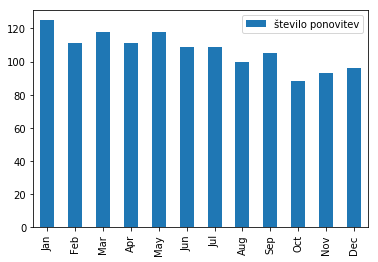

In [25]:
tabela_vse = pd.DataFrame.from_dict(leto, 'index')
tabela_vse.columns = ['število ponovitev']
tabela_vse.plot(kind = 'bar')

Zdi se, kakor da je graf nagnjen nekoliko bolj levo, vendar so vrednosti razporejene precej enakomerno in so visoke tudi v srednjih mesecih. Ali bomo opazili razliko, če bomo gledali le prvih 200 igralk?

In [26]:
seznam_mesecev = []
for i in range(200):
    mesec = igralke.iloc[i]['datum_rojstva'].split()[1]
    seznam_mesecev.append(mesec)
leto = {'Jan' : 0, 'Feb' : 0, 'Mar' : 0, 'Apr' : 0, 'May' : 0, 'Jun' : 0, 'Jul': 0, 'Aug' : 0, 'Sep' : 0, 'Oct' : 0, 'Nov' : 0, 'Dec' : 0}
for mesec in leto:
    leto[mesec] = seznam_mesecev.count(mesec)

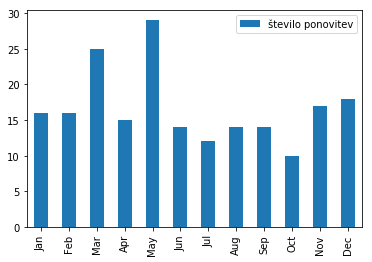

In [27]:
tabela200 = pd.DataFrame.from_dict(leto, 'index')
tabela200.columns = ['število ponovitev']
tabela200.plot(kind = 'bar')

Iz dobljenih grafov lahko rečemo, da istega trenda kot v mlajših kategorijah ne moremo opaziti. Če obstaja nima tolikšnega pomena kot pri mlajših.

### Dolžine profesionalnih karier

Zanima nas, kolikšna je povprečna dolžina karier igralk na lestvici. Zavedamo se, da nam bo rezultat za povprečno dolžino karier povedal, koliko časa v povprečju igralke, ki jih videvamo na turnirjih, že nastopajo na teh turnirjih. Ker nimamo podatkov o letu zaključka kariere (osredotočamo se namreč le na aktivne igralke), iz tega ne bomo mogli sklepati ničesar o celotnih dolžinah karier teniških igralk.

Takoj opazimo, da podatki o začetkih profesionalnih karier pri veliko igralkah manjkajo, zato bomo ugotovitve jemali nekoliko z zadržkom. Izračunali bomo povprečno starost, ko se igralke odločijo za profesionalno kariero in povprečno dolžino karier.

In [28]:
slovar, slovar_dolzina = {}, {} 
#prvi slovar vsebuje starosti posameznih igralk, ko so začele profesionalno pot, drugi slovar pa dolzino njihovih karier
sestevek1, sestevek2 = 0, 0 
#prvi seštevek bo za povprečno starost ob začetku, drugi za povprečno dolžino kariere
for i in range(1283):
    zacetek_kariere = igralke.iloc[i]['zacetek'].split()[0]
    rank_igralke = i + 1
    if zacetek_kariere != '-':
        leto = igralke.iloc[i]['datum_rojstva'].split()[2]
        
        starost_ob_zacetku_kariere = int(zacetek_kariere) - int(leto)
        slovar[rank_igralke] = starost_ob_zacetku_kariere
        sestevek1 += starost_ob_zacetku_kariere
        
        dolzina_kariere = 2019 - int(zacetek_kariere)
        sestevek2 += dolzina_kariere
        slovar_dolzina[rank_igralke] = dolzina_kariere

povprecna_starost_ob_zacetku_kariere = sestevek1 / len(slovar)
povprecna_dolzina = sestevek2 / len(slovar_dolzina)

'Povprečna starost, pri kateri igralke začnejo profesionalno kariero je {} let, povprečna dolžina karier pa {} let'.format(round(povprecna_starost_ob_zacetku_kariere, 2), round(povprecna_dolzina, 2))

'Povprečna starost, pri kateri igralke začnejo profesionalno kariero je 16.6 let, povprečna dolžina karier pa 12.21 let'

Rezultat za povprečno starost je pričakovan, saj se igralke za profesionalno pot res odločijo nekje pri 17 letih, ko počasi zaključujejo tekmovanje v nižjih kategorijah. 

Lahko se vprašamo, ali se trend v zadnjih letih kaj spreminja. Ali se igralke za profesionalno pot odločajo bolj zgodaj, glede na to, da se izboljšuje nivo igranja predvsem v nižjih kategorijah? 

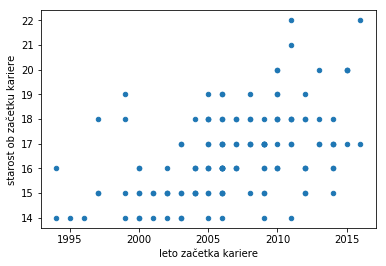

In [29]:
nov_seznam = []
for igralka in slovar:
    zacetek_kariere = int(str(igralke[igralka - 1:igralka]['zacetek']).split()[2])
    nov_seznam.append([zacetek_kariere, slovar[igralka], slovar_dolzina[igralka]]) 
tabela = pd.DataFrame(nov_seznam, columns=['leto začetka kariere', "starost ob začetku kariere", "dolžina kariere"])
tabela.plot.scatter('leto začetka kariere', 'starost ob začetku kariere')

Iz grafa lahko vidimo, da je od leta 2000 naprej v bistvu čedalje več starejših igralk, ki se odločajo za profesionalno pot. Razlog za to bi bil lahko napredek v športu in sicer predvsem poudarek na pravilni fizični in psihični pripravi, kar preprečuje poškodbe in omogoča, da igralci tekmujejo več let kot včasih. Opazimo pa tudi vedno manjše število mlajših igralk. To lahko pripišemo nepopolni bazi podatkov - ravno profili igralk, ki so začele kariero v zadnjih nekaj letih, so po navadi nepopolno izpolnjeni. Graf bi bil lahko precej drugačen, če bi imeli na voljo podatek o začetku kariere za vse igralke lestvice.

Še enkrat je treba poudariti, da smo pri delu obravnavali le 141 od 1284 igralk, zato moramo vse rezultate in zaključke jemati z zadržkom.

### Levičarke vs desničarke

Pri nekaterih športih lahko leva roka pomeni prednost. To je v tenisu kar izrazito, saj lahko levičarji s svojo taktiko zmedejo marsikaterega igralca - če ne drugega zato, ker ni vajen igre proti njim. Kot zanimivost lahko omenim, da Rafael Nadal, eden izmed najboljših teniških igralcev, igra z levo roko, kljub temu, da je desničar. Njegovemu stricu, izkušenemu trenerju, se je to namreč zdela velika prednost.

Zanima nas, kolikšen delež igralk je levičark in ali se ta delež spreminja, ko gledamo prvih 10, prvih 100, prvih 500 ... igralk.

In [30]:
seštevek_vseh = igralke['roka'].value_counts('leva')
prvi_2 = igralke.head(2)['roka'].value_counts('leva')
prvih_10 = igralke.head(10)['roka'].value_counts('leva')
prvih_50 = igralke.head(50)['roka'].value_counts('leva')
prvih_100 = igralke.head(100)['roka'].value_counts('leva')
prvih_500 = igralke.head(500)['roka'].value_counts('leva')
prvih_1000 = igralke.head(1000)['roka'].value_counts('leva')

skupen_slovar = {'seštevek vseh' : seštevek_vseh, 'prvi 2' : prvi_2, 'prvih 10' : prvih_10, 'prvih 50' : prvih_50, 'prvih 100' : prvih_100, 'prvih 500' : prvih_500, 'prvih 1000' : prvih_1000}
tabela = pd.DataFrame.from_dict(skupen_slovar, 'index')
tabela

,desna,leva
prvi 2,0.500000,0.500000
prvih 10,0.800000,0.200000
prvih 100,0.928571,0.071429
prvih 1000,0.913043,0.086957
prvih 50,0.940000,0.060000
prvih 500,0.915385,0.084615
seštevek vseh,0.912052,0.087948


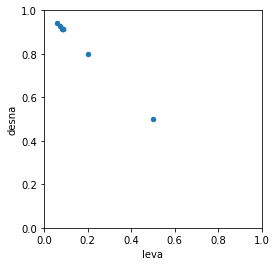

In [31]:
tabela.plot.scatter('leva', 'desna')

from matplotlib import pyplot as plt
plt.plot(range(1))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

Vidimo, da se procent levičark giblje pod 20 %, pri prvih 10 igralkah naraste na točno 20 %, če gledamo prvi dve igralki pa kar 50 %. Glede na to, da je na splošno levičarjev nekje 10 %, bi lahko rekli, da predstavlja nekakšne vrste prednost.

### Še nekaj povezav med podatki

#### Povezava med začetkom oziroma dolžino kariere in zaslužkom

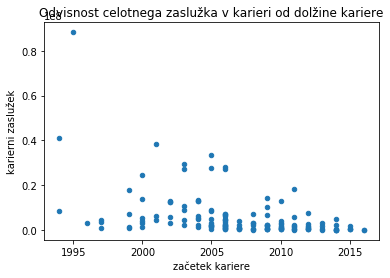

In [32]:
začetek_vs_zaslužek = []
for i in range(1284):
    začetek_kariere  = igralke.iloc[i]['zacetek'].split()[0]
    if začetek_kariere != '-':
        začetek_kariere  = int(začetek_kariere)
        zaslužek_v_karieri = int(igralke.iloc[i]['karierni_zasluzek'])
        začetek_vs_zaslužek.append([začetek_kariere, zaslužek_v_karieri])
tabela = pd.DataFrame(začetek_vs_zaslužek, columns=['začetek kariere', 'karierni zaslužek'])
tabela.plot.scatter('začetek kariere', 'karierni zaslužek', title='Odvisnost celotnega zaslužka v karieri od dolžine kariere')

Zanimalo nas je, ali daljša kariera pomeni več zaslužka. Graf se nekoliko giblje v tej smeri, vendar zaradi pomankljivosti podatkov ne moremo veliko sklepati.

Lahko poiščemo igralko, ki predstavlja piko v levem zgornjem kotu, ki izrazito izstopa.

In [33]:
igralke['karierni_zasluzek'].sort_values(ascending=False)

rank
16      88233301
40      40931048
29      38342119
3       33492413
51      29278989
          ...   
879         1112
1224        1023
1224         950
1224         912
1224         912
Name: karierni_zasluzek, Length: 1284, dtype: int64

In [34]:
#katera igralka je to?
igralke.loc[16]

id                            230234
ime                  Williams Serena
drzava                 United States
datum_rojstva            26 Sep 1981
starost                           37
                          ...       
zacetek                         1995
letni_zasluzek           3.77017e+06
karierni_zasluzek           88233301
letno_razmerje                  18/6
karierno_razmerje            801/136
Name: 16, Length: 13, dtype: object

#### Razmerje zmag in porazov v odvisnosti od zaslužka

Poglejmo si, ali večji odstotek zmag gotovo pomeni višji zaslužek. Predvidevamo, da bo odgovor ne, saj nekaj zmag na manjših turnirjih včasih ne prinese niti začetne vsote, na kakih večjih.

In [35]:
seznam_letni, seznam_karierni, letni_zasluzek, karierni_zasluzek = [], [], [], []
for i in range(1282):
    seznam_letni.append(igralke.iloc[i]['letno_razmerje'])
    seznam_karierni.append(igralke.iloc[i]['karierno_razmerje'])
    letni_zasluzek.append(igralke.iloc[i]['letni_zasluzek'])
    karierni_zasluzek.append(igralke.iloc[i]['karierni_zasluzek'])
    
def zračunaj_deleže(seznam):
    nov_seznam = []
    for element in seznam:
        element = element.split('/')
        if element[0] != '' and element[1] != '':
        #print(element, int(element[0]), int(element[1]))
            element = int(element[0]) / ((int(element[0]) + int(element[1])))
            nov_seznam.append(element)
    return nov_seznam
#print(seznam_letni)

In [36]:
letno = pd.DataFrame(zračunaj_deleže(seznam_letni), columns=['letni delež zmag'])
karierno = pd.DataFrame(zračunaj_deleže(seznam_karierni), columns=['karierni delež zmag'])
zasluzek_l = pd.DataFrame(letni_zasluzek, columns=['letni zasluzek'])
zasluzek_k = pd.DataFrame(karierni_zasluzek, columns=['karierni zasluzek'])

In [37]:
nov_slovar = {'letno razmerje' : letno['letni delež zmag'], 'letni zasluzek' : zasluzek_l['letni zasluzek'], 'karierno razmerje' : karierno['karierni delež zmag'], 'karierni zasluzek' : zasluzek_k['karierni zasluzek']}
tabela = pd.DataFrame(nov_slovar)
tabela

,letno razmerje,letni zasluzek,karierno razmerje,karierni zasluzek
0,0.807018,7409564.0,0.695518,28145579
1,0.707692,5686362.0,0.656733,27156841
2,0.706897,6657719.0,0.711785,33492413
3,0.745763,5737247.0,0.660643,13108625
4,0.677419,6394289.0,0.597973,7629197
...,...,...,...,...
1277,0.222222,684.0,0.000000,912
1278,0.000000,684.0,0.000000,912
1279,0.272727,1664.0,0.250000,1834
1280,NaN,950.0,0.000000,950


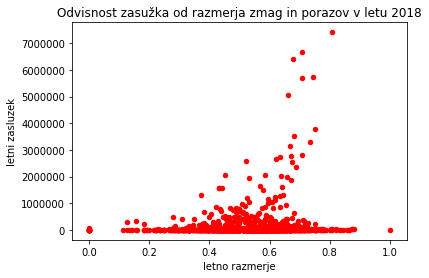

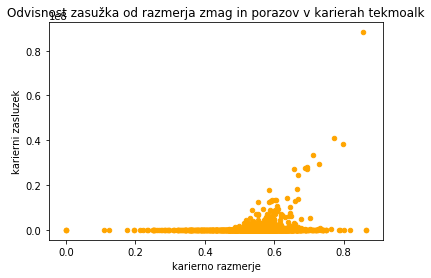

In [62]:
tabela.plot.scatter('letno razmerje', 'letni zasluzek', title='Odvisnost zasužka od razmerja zmag in porazov v letu 2018', color='red')
tabela.plot.scatter('karierno razmerje', 'karierni zasluzek', title='Odvisnost zasužka od razmerja zmag in porazov v karierah tekmoalk', color='orange')

Kot vidimo, boljše razmerje med zmagami in porazi lahko pomeni višji zaslužek.